In [2]:
import pandas as pd
df=pd.read_csv('housing.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

<Axes: xlabel='CRIM', ylabel='MEDV'>

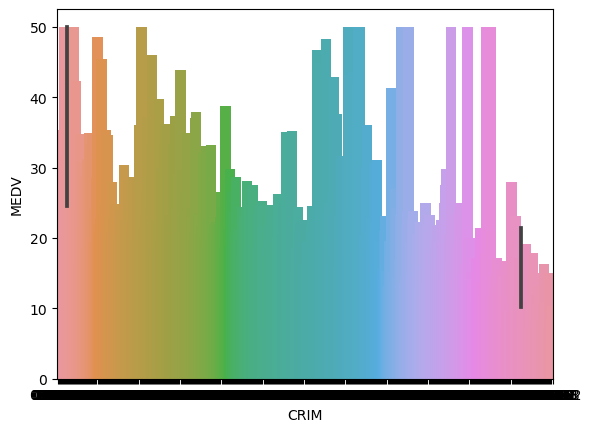

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(data=df,x='CRIM',y='MEDV',width=10)

In [11]:
df['CRIM'].fillna(df['CRIM'].mean(),inplace=True)
df['ZN'].fillna(df['ZN'].mean(),inplace=True)
df['INDUS'].fillna(df['INDUS'].mean(),inplace=True)
df['CHAS'].fillna(df['CHAS'].mean(),inplace=True)
df['LSTAT'].fillna(df['CRIM'].mean(),inplace=True)
df['AGE'].fillna(df['AGE'].mean(),inplace=True)

In [12]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

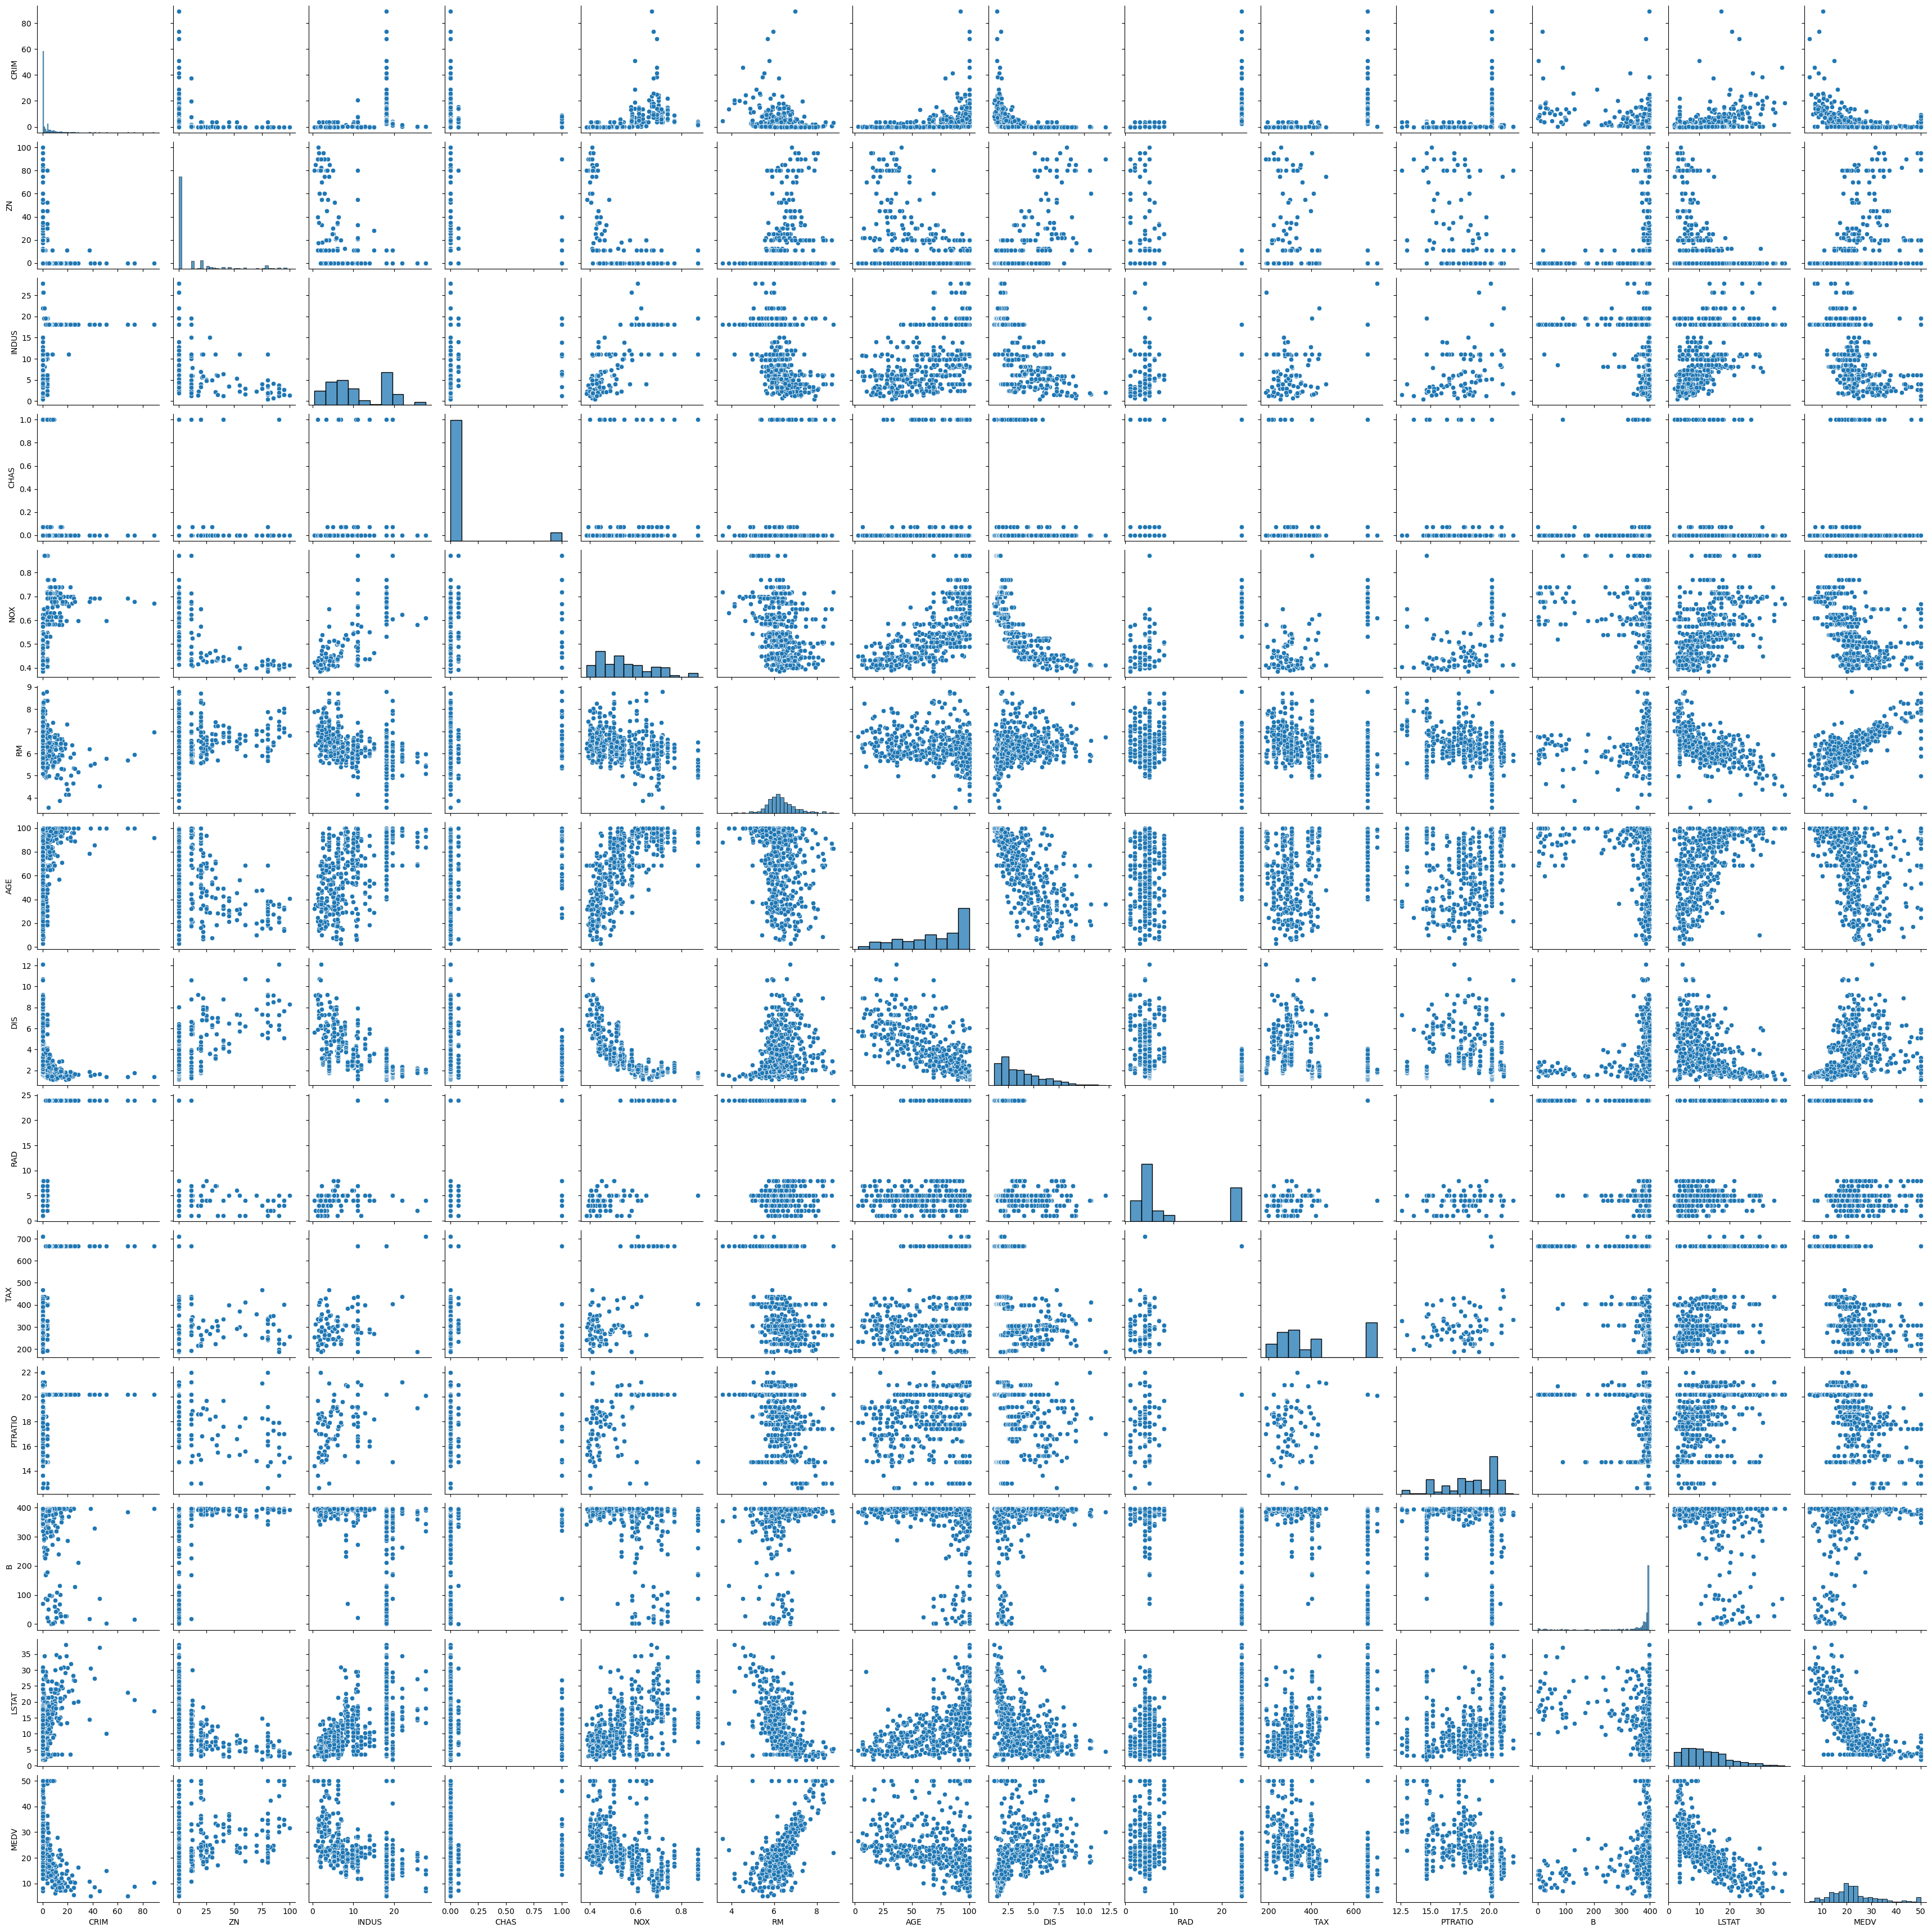

In [13]:
sns.pairplot(df)

In [14]:
df.shape

(506, 14)

<Axes: >

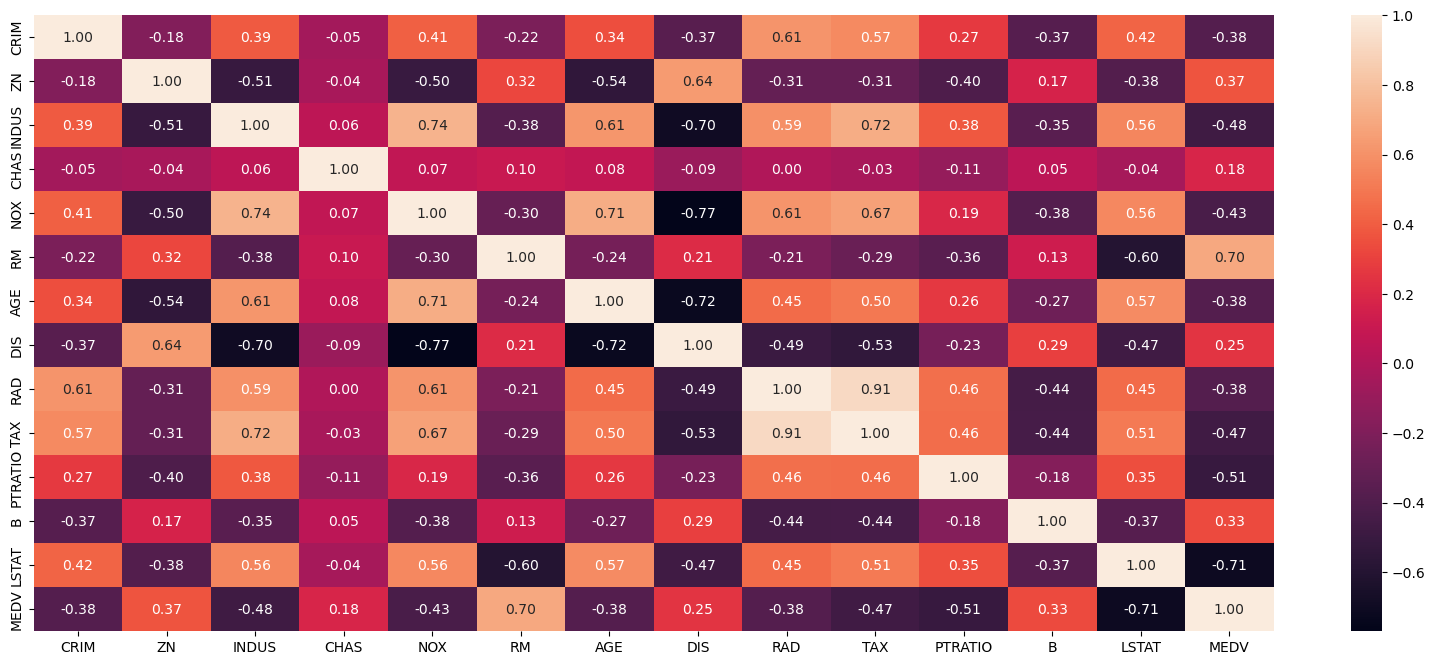

In [17]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,fmt='0.2f')#

In [19]:
import numpy as np
x=pd.DataFrame(np.c_[df['RM'],df['LSTAT']],columns=['RM','LSTAT'])#
y=df['MEDV']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

lin_mdl=LinearRegression()
lin_mdl.fit(x_train,y_train)

LinearRegression()

In [25]:
y_train_pred=lin_mdl.predict(x_train)
rmse=np.sqrt(mean_squared_error(y_train,y_train_pred))##
r2=r2_score(y_train,y_train_pred)
print("For trained data:- ")
print("RSME: ",rmse)
print("S2_Score: ",r2)

y_test_pred=lin_mdl.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,y_test_pred))##
r2=r2_score(y_test,y_test_pred)
print("For tasted data:- ")
print("RSME: ",rmse)
print("S2_Score: ",r2)


For trained data:- 
RSME:  5.842671153262706
S2_Score:  0.6026061513071355
For tasted data:- 
RSME:  4.986410832969206
S2_Score:  0.6824234974382746


In [ ]:
#End